# Module 2 Assignment: Selection Sort Algorithm Implementation
## Stephen Lin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import string

In [2]:
# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

**1. We will again generate random data for this assignment.  Please set up five data arrays of length 5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use either integers or floating point).  Ensure that a common random number seed is used to generate each of the arrays.** 

In [3]:
array_lengths = [5000, 10000, 15000, 20000, 25000]
arrays = []

# Loop through list and appends randomly generated, uniformly distributed lists of numbers of different lengths
for i in array_lengths:
    np.random.seed(500)    
    float = list(np.random.uniform(0,1000000,i))
    arrays.append(float)

**2. Execute the base algorithm (Selection Sort) for each of the random number arrays, noting the execution time with each execution. Use one of the timing methods we learned in class.**

In [4]:
execution_times = []

# Execute selection sort on float arrays
for i in range(len(arrays)):
    start_time = time.perf_counter()
    selectionSort(arrays[i])
    stop_time = time.perf_counter()
    execution_time = (stop_time-start_time)*1000 # convert
    execution_times.append(execution_time)

**3. Just as in the last assignment, please organize the results of the study into a table showing the size of data array and the time taken to sort the array. Discuss the differences in timing and how they relate to data type and length of array.**

In [5]:
df = pd.DataFrame({
    'Array Length' : array_lengths,
    'Execution Time' : execution_times
})

df

,Array Length,Execution Time
0,5000,1555.604127
1,10000,9031.089620
2,15000,13715.732026
3,20000,31554.781702
4,25000,53811.754918


**4. Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against problem size for each form of the algorithm being tested.**

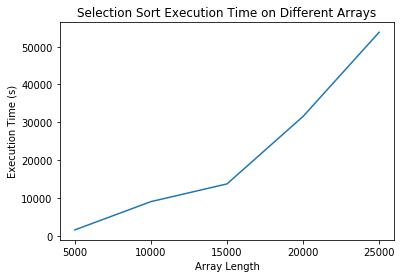

In [6]:
ax = sns.lineplot(x='Array Length', y='Execution Time', data=df)

plt.title('Selection Sort Execution Time on Different Arrays')
plt.xlabel('Array Length')
plt.ylabel('Execution Time (s)')
plt.xticks([5000,10000,15000,20000,25000])
plt.rcParams["figure.figsize"] = (5,5)

plt.show()

**5. Extra Credit #1 (6 points) :  Do the same thing for each of the following four data types:  (1) uniformly distributed random integer, (2) uniformly distributed random float, (3) randomly generated text string of length 5, and (4) randomly generated text string of length 15.  You can use something like this to generate the strings if you'd like**

In [7]:
integers_arrays = []
floats_arrays = []
strings_len_5_arrays = []
strings_len_15_arrays = []

# Loop through list and appends randomly generated, uniformly distributed lists of numbers of different lengths
for i in array_lengths:
    np.random.seed(500)    
    
    # create list of random integers    
    integers = list(np.random.randint(0,1000000,i))
    integers_arrays.append(integers)
    
    # create list of random uniform floats    
    floats = list(np.random.uniform(0,1000000,i))
    floats_arrays.append(floats)

    # create list of random strings of length 5
    strings_len_5 = [''.join(random.choices(string.ascii_letters, k = 5)) for j in range(i)]
    strings_len_5_arrays.append(strings_len_5)
    
    # create list of random strings of length 15
    strings_len_15 = [''.join(random.choices(string.ascii_letters, k = 15)) for j in range(i)]
    strings_len_15_arrays.append(strings_len_15)

In [8]:
integers_execution_times = []
floats_execution_times = []
strings_len_5_execution_times = []
strings_len_15_execution_times = []

for i in range(len(integers_arrays)):
    start_time = time.perf_counter()
    selectionSort(integers_arrays[i])
    stop_time = time.perf_counter()
    execution_time = (start-stop)*1000
    integers_execution_times.append(execution_time)

for i in range(len(floats_arrays)):
    start_time = time.perf_counter()
    selectionSort(floats_arrays[i])
    stop_time = time.perf_counter()
    execution_time = (start-stop)*1000
    floats_execution_times.append(execution_time)

for i in range(len(strings_len_5_arrays)):
    start_time = time.perf_counter()
    selectionSort(strings_len_5_arrays[i])
    stop_time = time.perf_counter()
    execution_time = (start-stop)*1000
    strings_len_5_execution_times.append(execution_time)
    
for i in range(len(strings_len_15_arrays)):
    start_time = time.perf_counter()
    selectionSort(strings_len_15_arrays[i])
    stop_time = time.perf_counter()
    execution_time = (start-stop)*1000
    strings_len_15_execution_times.append(execution_time)

In [9]:
execution_times_df= pd.DataFrame({
    'Array Size' : array_lengths,
    "Integer Execution Time" : integers_execution_times,
    "Float Execution Time" : floats_execution_times,
    "Strings Length 5 Execution Time" : strings_len_5_execution_times,
    "Strings Length 15 Execution Time" : strings_len_15_execution_times
})

execution_times_df

,Array Size,Float Execution Time,Integer Execution Time,Strings Length 15 Execution Time,Strings Length 5 Execution Time
0,5000,-1610.644389,-2883.594401,-1684.026438,-1691.202350
1,10000,-6330.925065,-11161.924339,-8288.845229,-5883.803699
2,15000,-14629.208440,-18607.123760,-13672.202991,-14194.591194
3,20000,-27691.172184,-29779.921077,-20982.841165,-23017.078019
4,25000,-41684.963189,-40073.908234,-35929.245657,-35822.451765


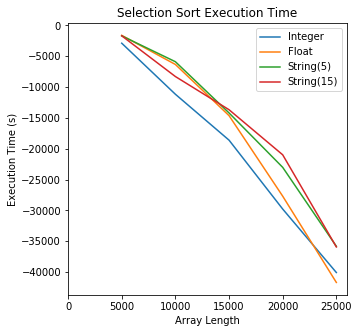

In [10]:
ax = sns.lineplot(x='Array Size', y='Integer Execution Time', data=execution_times_df)
ax = sns.lineplot(x='Array Size', y='Float Execution Time', data=execution_times_df)
ax = sns.lineplot(x='Array Size', y='Strings Length 5 Execution Time', data=execution_times_df)
ax = sns.lineplot(x='Array Size', y='Strings Length 15 Execution Time', data=execution_times_df)
ax.legend(['Integer','Float','String(5)','String(15)'],prop={'size': 10})

plt.title('Selection Sort Execution Time')
plt.xlabel('Array Length')
plt.ylabel('Execution Time (s)')
plt.xticks([0,5000,10000,15000,20000,25000])
plt.rcParams["figure.figsize"] = (5,5)

plt.show()

**6. Extra Credit #2 (4 points):  For each of the four sections in this assignment, make a commit to your git repository that includes (1) a summary, (2) a description, and (3) your code changes.  Please upload all four diff files to the comments section of the Assignment submission OR share your github repo with me as a collaborator so I can view it online (username llevenson).**

Please see attached diff files

**7. Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.**